## Ejercicios Seaborn

In [50]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")

numpy==2.2.1
pandas==2.2.3
matplotlib==3.10.0
seaborn==0.13.2


### Ejercicio 0:
- Lee el archivo **`pokemon.csv`** y guardalo en la variable **`df`**.

In [52]:
df = pd.read_csv('../Data/Pokemon.csv')
df.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


### Ejercicio 1:
- Haz un diagrama de barras con el número de pokémons en cada generación.

<Axes: xlabel='Generation', ylabel='count'>

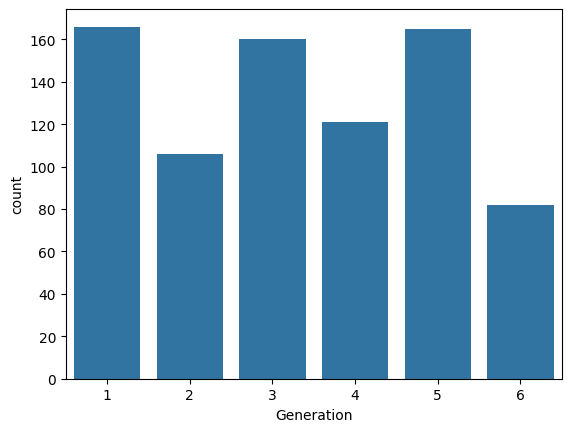

In [53]:
# Countplot ya qu enos piden el numero de pokemons, nos piden el conteo
sns.countplot(df, x = 'Generation')

### Ejercicio 2:
- Representar la frecuencia de pokémons por tipo 1 en un gráfico de barras.

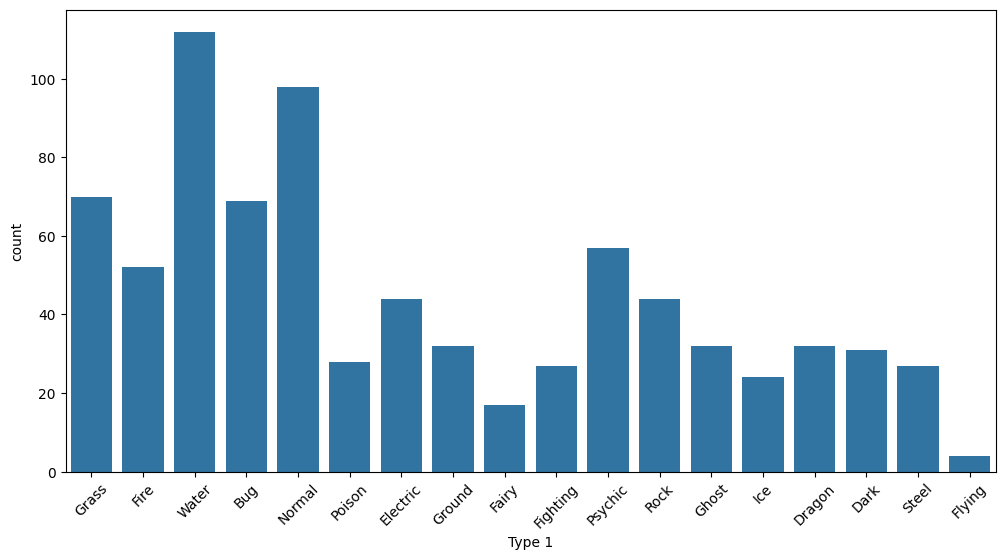

In [54]:
# Con el mismo orden que aparecen
plt.figure(figsize=(12, 6))
sns.countplot(df, x = 'Type 1')
plt.xticks (rotation=45);


In [55]:
# con orden DESCENDENTE
sorted_types_desc = df['Type 1'].value_counts().index
sorted_types_desc

Index(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric',
       'Rock', 'Dragon', 'Ground', 'Ghost', 'Dark', 'Poison', 'Steel',
       'Fighting', 'Ice', 'Fairy', 'Flying'],
      dtype='object', name='Type 1')

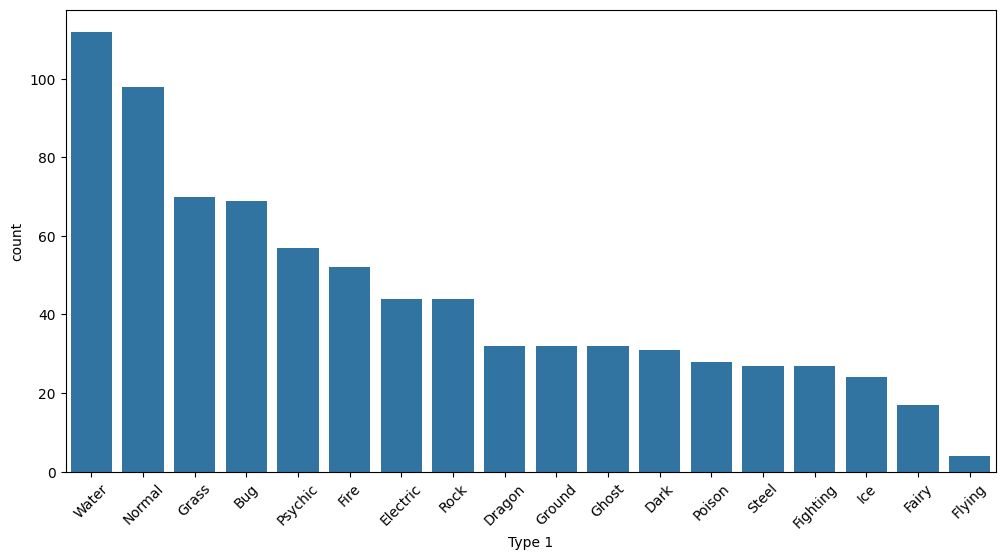

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x='Type 1', order=sorted_types_desc)
plt.xticks(rotation=45);

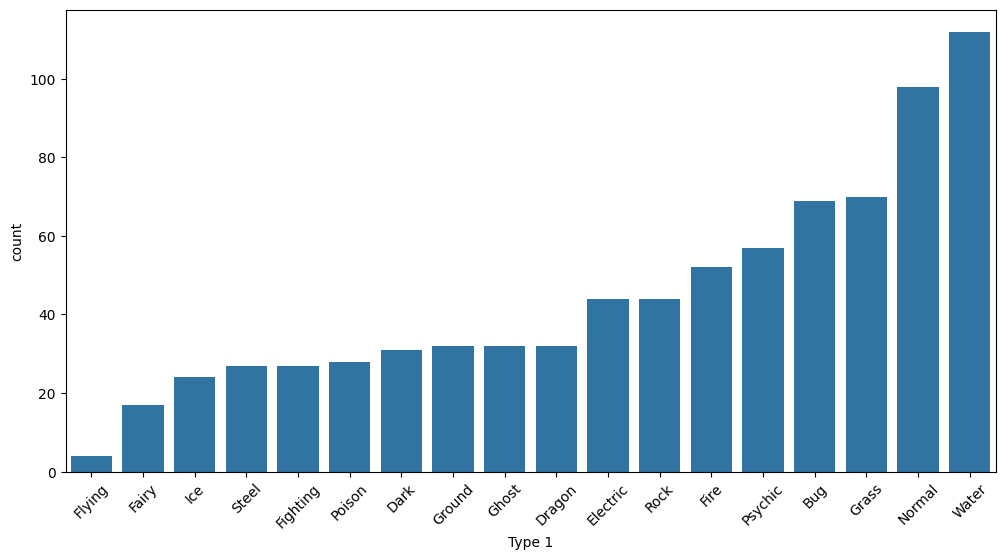

In [57]:
# con orden ASCENDENTE
plt.figure(figsize=(12, 6))
sns.countplot(df, x='Type 1', order=df['Type 1'].value_counts(ascending=True).index)
plt.xticks(rotation=45);

### Ejercicio 3:
- Haz un diagrama de barras con el número de pokémons tipo 1 igual a "Grass" y "Fire".

In [58]:
filtro = df['Type 1'].isin(['Grass', 'Fire'])
df[filtro].shape # Hay 122 pokemosn entre grass y fire

(122, 13)

In [62]:
# sns.countplot(df['Grass'] ['Fire'])

### Ejercicio 4:
- Haz un histograma con los puntos de salud HP de los pokémons, utiliza el color verde.
- Dibuja una línea vertical magenta que represente el promedio.

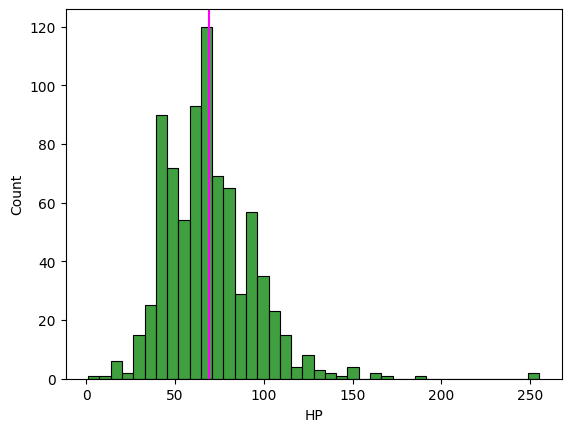

In [63]:
sns.histplot(df, x="HP", color='green')
plt.axvline(df['HP'].mean(), color='magenta');

### Ejercicio 5:
-  Haz un histograma con la frecuencia de pokémons por rapidez (Speed).
-  Dibuja una línea vertical magenta que corresponda con la mediana.
-  Dibuja unas líneas verticales discontinuas de color magenta que correspondan con los cuartiles Q1 y Q3.

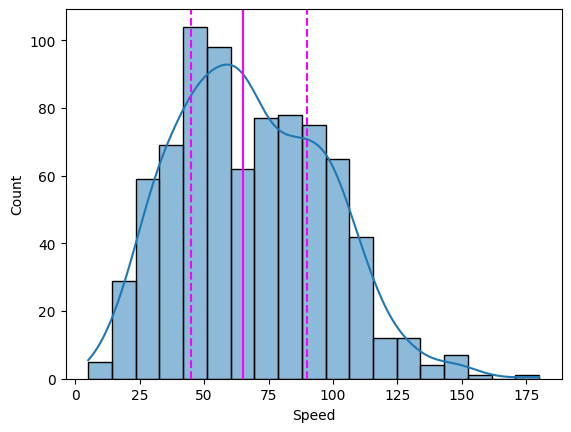

In [64]:
sns.histplot(df, x= 'Speed', kde= True)
plt.axvline(df['Speed'].median(), color= 'Magenta')
plt.axvline(df['Speed'].quantile(0.25), color= 'Magenta', linestyle='--') #Q1
plt.axvline(df['Speed'].quantile(0.75), color= 'Magenta',linestyle='--') # Q3

### Ejercicio 6:
- Haz un histograma con los puntos de salud (HP) de los pokémons (Type 1) = "Fire".

### Ejercicio 7:
- Haz un scatter plot y un scatter hex plot con los valores de "Attack" y "Defense"de los pokémons.

<Axes: xlabel='Attack', ylabel='Defense'>

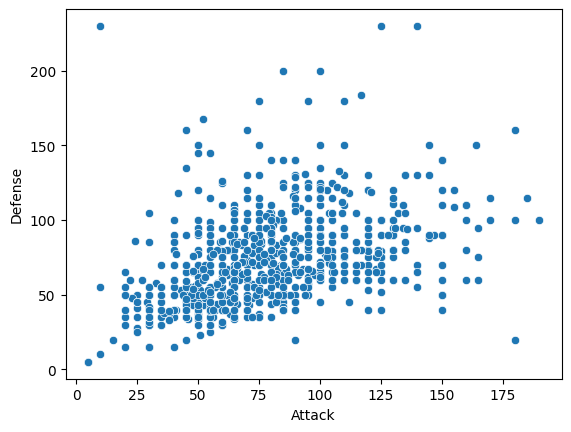

In [65]:
sns.scatterplot(df, x='Attack', y='Defense')

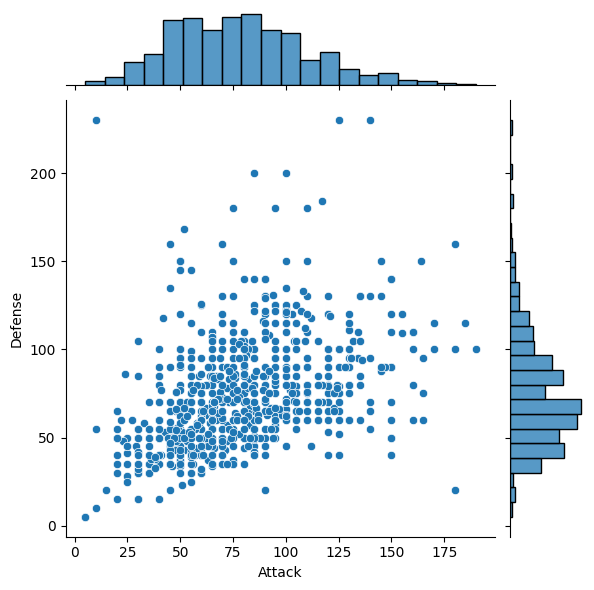

In [66]:
# Muestra un histograma incluido en el grafico
sns.jointplot(df, x='Attack', y='Defense')

### Ejercicio 8:
- Haz un scatter hex plot con los valores de "Attack" y "Defense"de los pokémons tipo "Water" y "Fire".

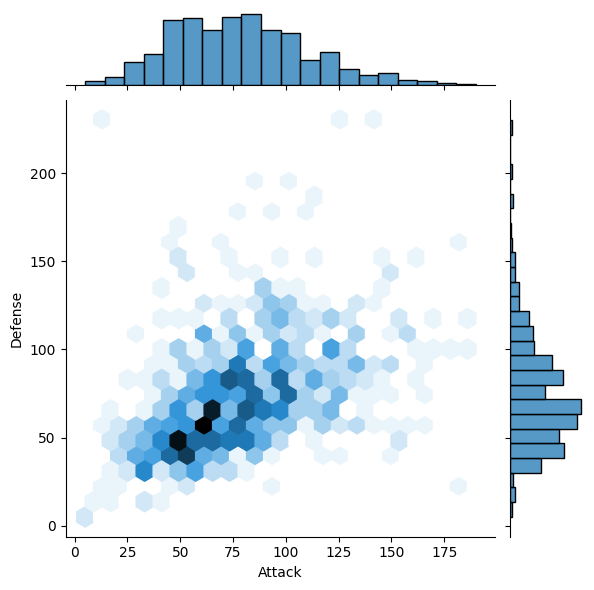

In [68]:
sns.jointplot(df, x='Attack', y='Defense', kind='hex')

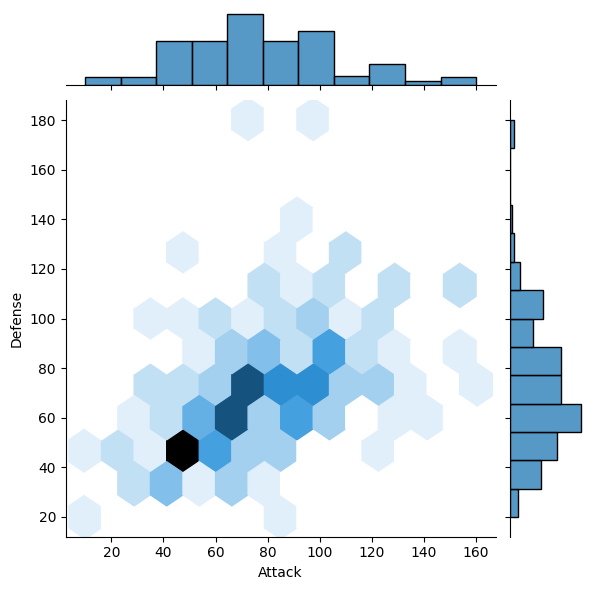

In [70]:
filtro = df['Type 1'].isin(['Fire', 'Water'])
sns.jointplot(df[filtro], x='Attack', y='Defense', kind='hex')

### Ejercicio 9:
- Haz un KDE plot con la salud y el ataque de los pokémons.

### Ejercicio 10:
- Haz una grafica de caja con el ataque de los pokémons legendarios y no legendarios.

<Axes: xlabel='Legendary', ylabel='Attack'>

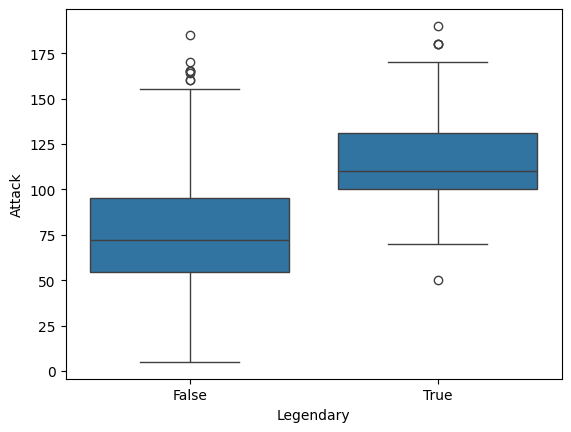

In [72]:
sns.boxplot(df, x=df['Legendary'], y=df['Attack'])

<Axes: xlabel='Attack'>

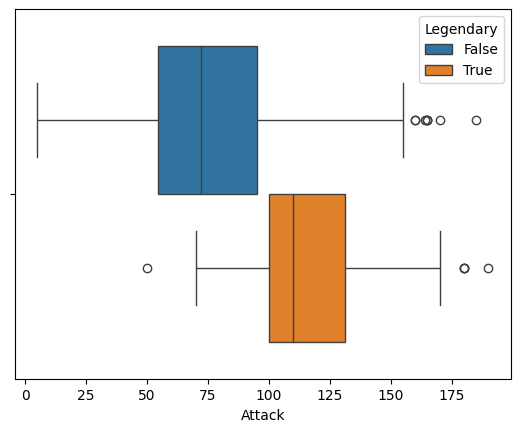

In [ ]:
# Con "hue" comparamos con otra columna y la colorea
sns.boxplot(df, x=df['Attack'], hue=df['Legendary'])

### Ejercicio 11:
- Haz una grafica de violin con el ataque de los pokémons legendarios y no legendarios.

### Ejercicio 12:
- Haz un pairplot y compara los puntos de salud (HP), el ataque y la defensa de los pokémons.

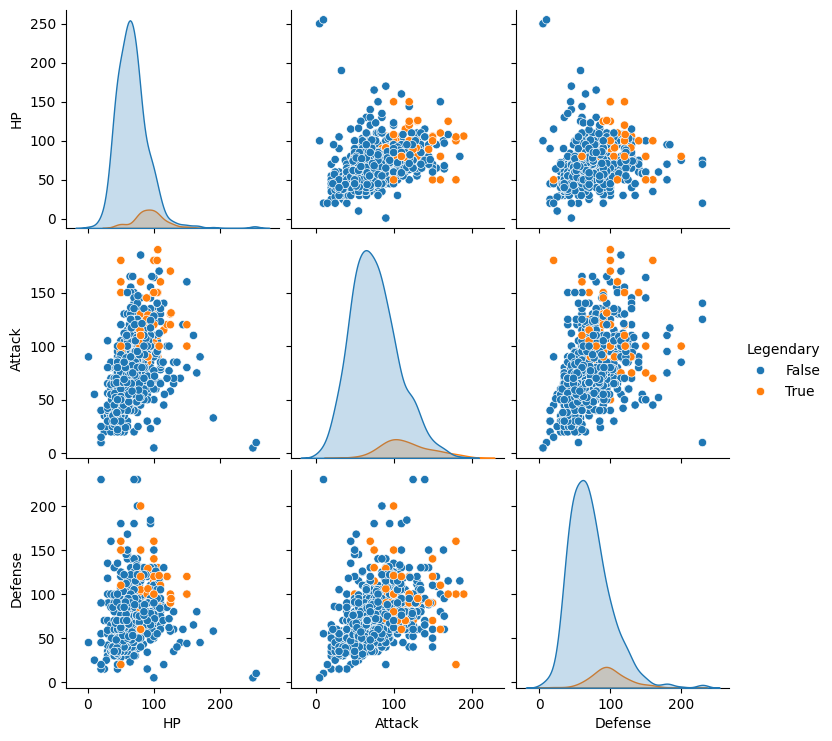

In [ ]:
sns.pairplot(df, vars=['HP','Attack','Defense'], hue='Legendary')
# HUE colorea la columna que le pasemos

### Ejercicio 13:
- Haz boxplots de la variable 'Total' distiguiendo por generación y entre legendarios y no legendarios.

<Axes: xlabel='Legendary', ylabel='Total'>

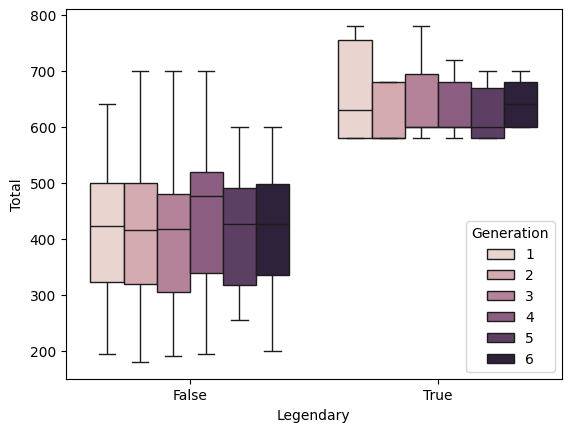

In [ ]:
sns.boxplot(x=df['Legendary'], y=df['Total'], hue=df['Generation'])
# Los false son los que no son legendarios

### Ejercicio 14:
- Haz un heatmap para comparar la correlación entre salud, ataque, ataque especial, defensa, defensa especial y velocidad.

<Axes: >

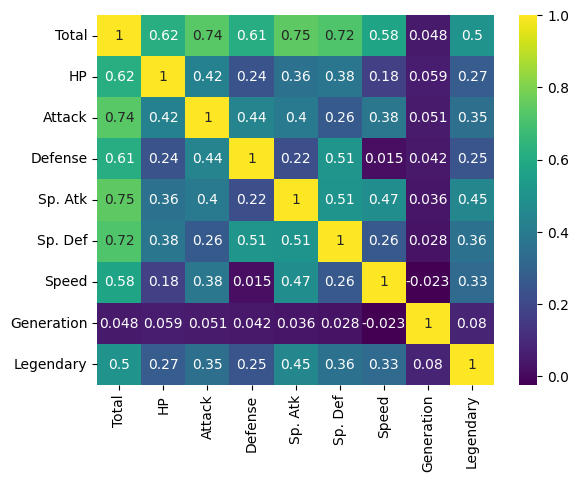

In [84]:
df_corr = df[['Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr()
sns.heatmap(df_corr, annot=True, cmap='viridis')
# La columna "generacion" no aporta practicament eninguna correlacion con ninguna, se podria eliminar

<Axes: >

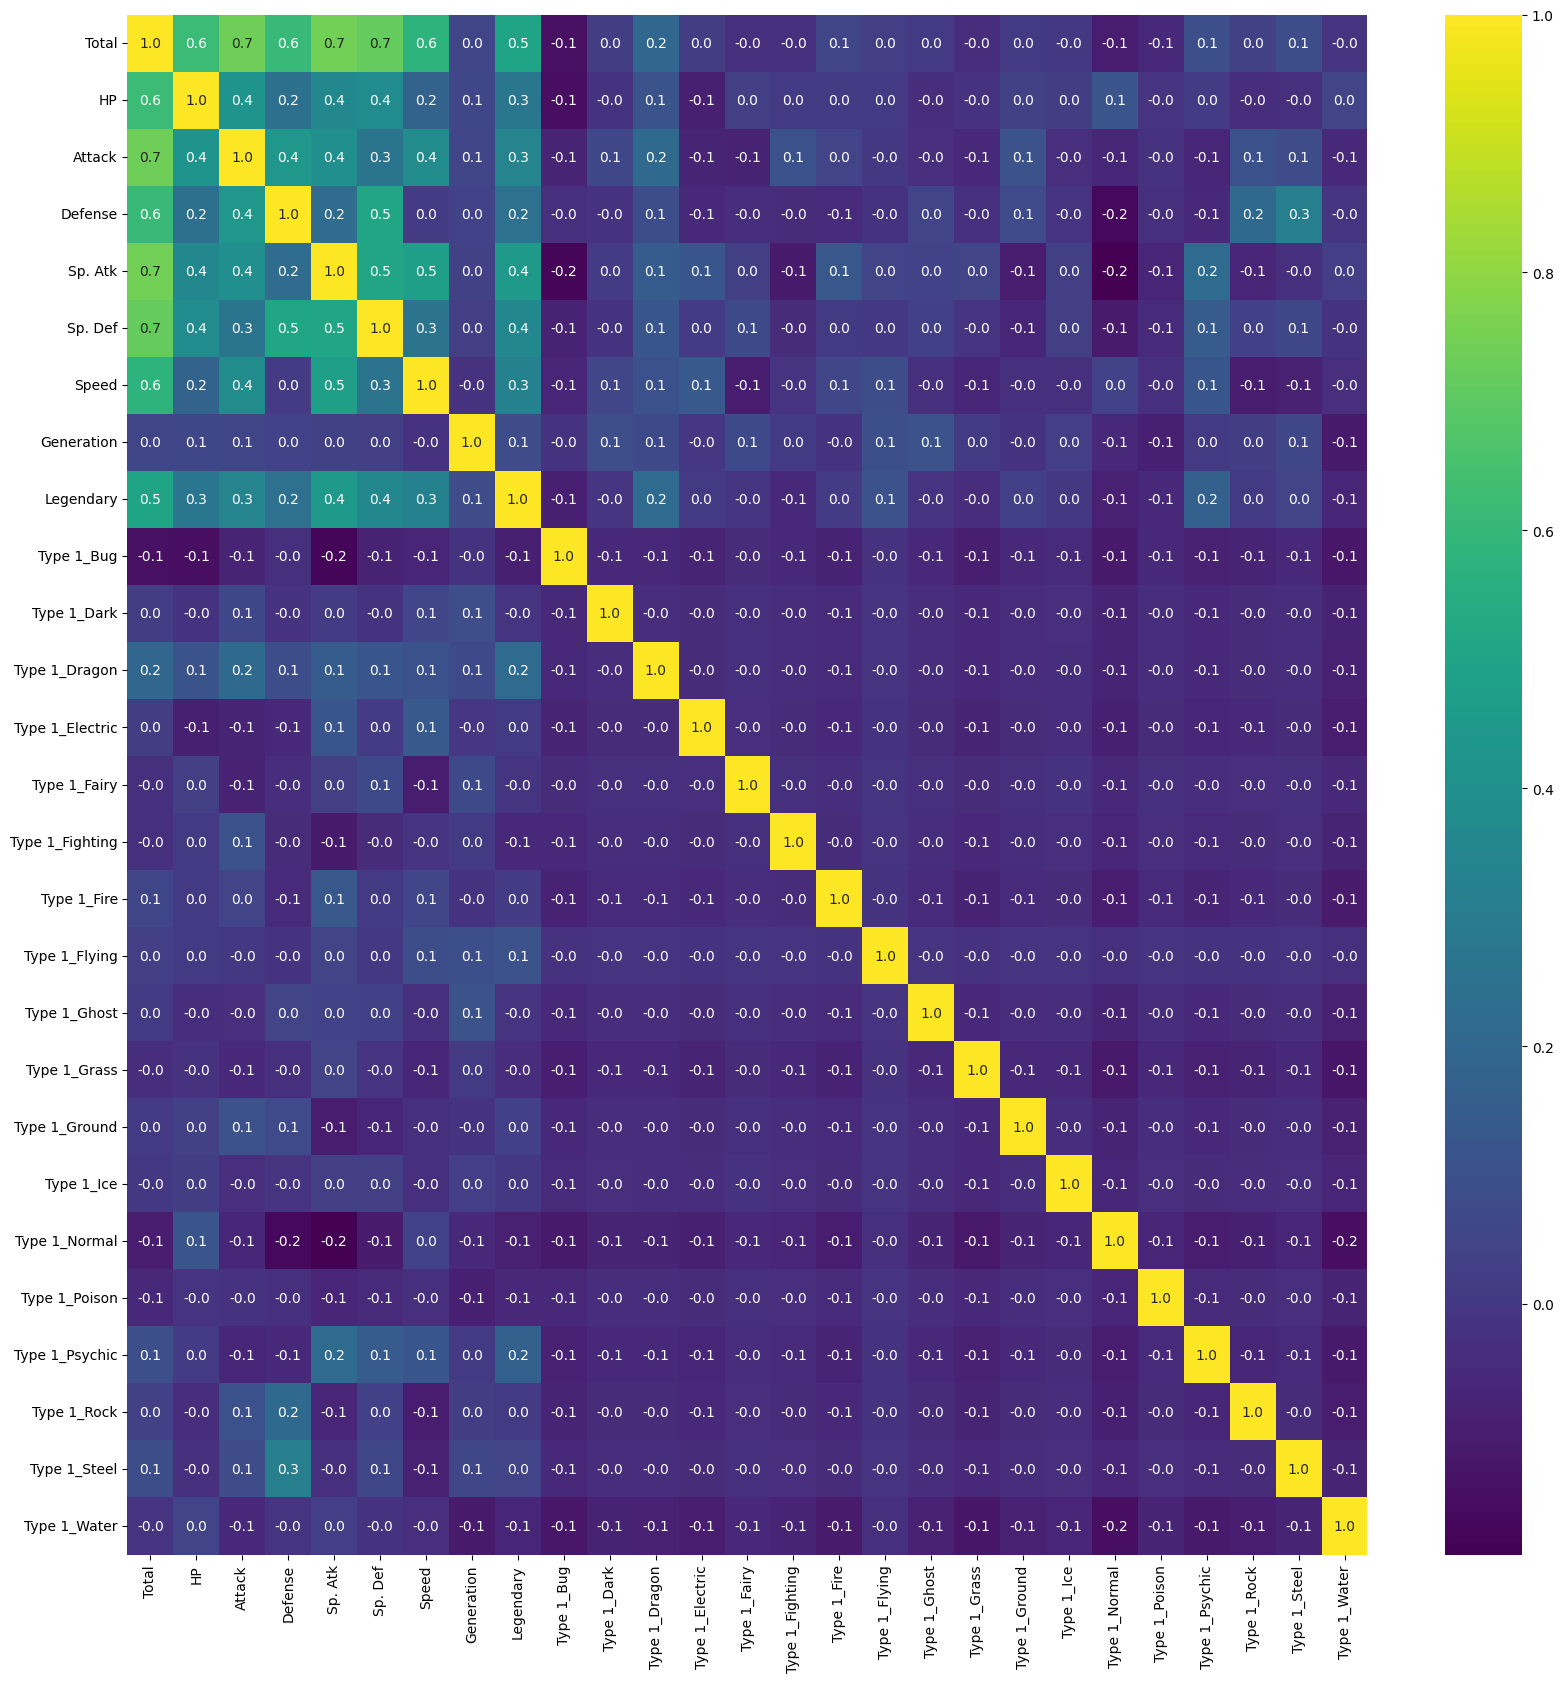

In [89]:
# OPcion 1
plt.figure(figsize=(20, 20))
# Encoding de la columna Type 1 y usarlas para calcular la correlacion
df_numericals = df[['Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']]
# Encoding
type_dummies = pd.get_dummies(df['Type 1'], prefix='Type 1')

# Juntar en un solo dataframe: df_numericals + encoding
df_concat = pd.concat([df_numericals, type_dummies], axis=1)
# Calcular la correlacion
df_corr = df_concat.corr()
sns.heatmap(df_corr, annot=True, fmt=".1f", cmap="viridis")

In [ ]:
# Opcion 2
# dfdrop y borrar todas menos las qu einteresan

# Encoding

# Corrrelacion

### Ejercicio 15:
- Encontrar los 5 mejores pokémons con respecto a la columna "Total", del tipo "Electric", "Fire", "Water" y comparar su salud, ataque, defensa y velocidad en un mapa de calor.

### Ejercicio 16:
- Usando FacetGrid obtén un KDE plot del ataque para legendarios y no legendarios.
- Repite lo mismo, ahora separándolos también por generaciones en cada fila.